In [429]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline

In [430]:
## Part I:

In [431]:
headers = ['X', 'Y']
Gdata = pd.read_csv('./data/G-data.csv', header=None, index_col=None, names=headers)
Gdata

X          Y
0    8.724514  16.680705
1    8.111094  14.039865
2    3.891538  11.217337
3    6.595019  16.108606
4    9.159665  15.282327
..        ...        ...
245  3.156732  13.434926
246  6.588365  15.036372
247  7.806401  13.882248
248  8.672002  14.524847
249  5.440932  12.231611

[250 rows x 2 columns]

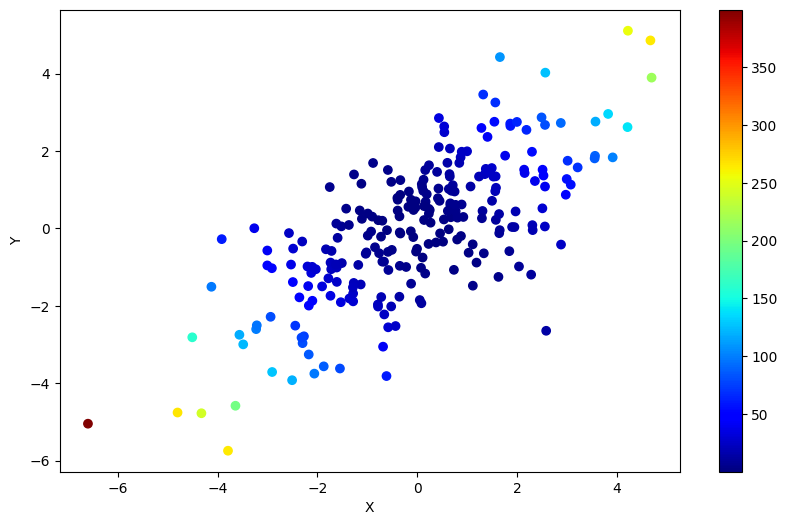

In [432]:
meanValue = Gdata.mean()
covValue = Gdata.cov()

X = Gdata.to_numpy()
S = covValue.to_numpy()
for i in range(2):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis(mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(Gdata.X, Gdata.Y, c=anomaly_score, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.colorbar(p)
plt.show()

In [433]:
anom = pd.DataFrame(anomaly_score, index=Gdata.index, columns=['Anomaly Score'])
result = pd.concat((Gdata, anom), axis=1)
result.nlargest(5, 'Anomaly Score')

X         Y  Anomaly Score
8   -6.600549 -5.045834     399.662410
94  -4.804438 -4.756795     266.773486
89   4.675894  4.860870     265.079681
26  -3.793011 -5.744357     264.258449
204  4.224742  5.111333     253.368184

In [434]:
## Part II:

In [435]:
headers = ['X', 'Y', 'Class']
Cdata = pd.read_csv('./data/compound.txt', header=None, index_col=None, names=headers, sep='\t')
Cdata.drop(columns=['Class'], inplace=True)
Cdata

X      Y
0    26.75  22.15
1    29.80  22.15
2    31.55  21.10
3    27.70  20.85
4    29.90  19.95
..     ...    ...
394  15.85   9.95
395  15.35   9.90
396  15.60   9.45
397  15.30   9.15
398  15.10   9.55

[399 rows x 2 columns]

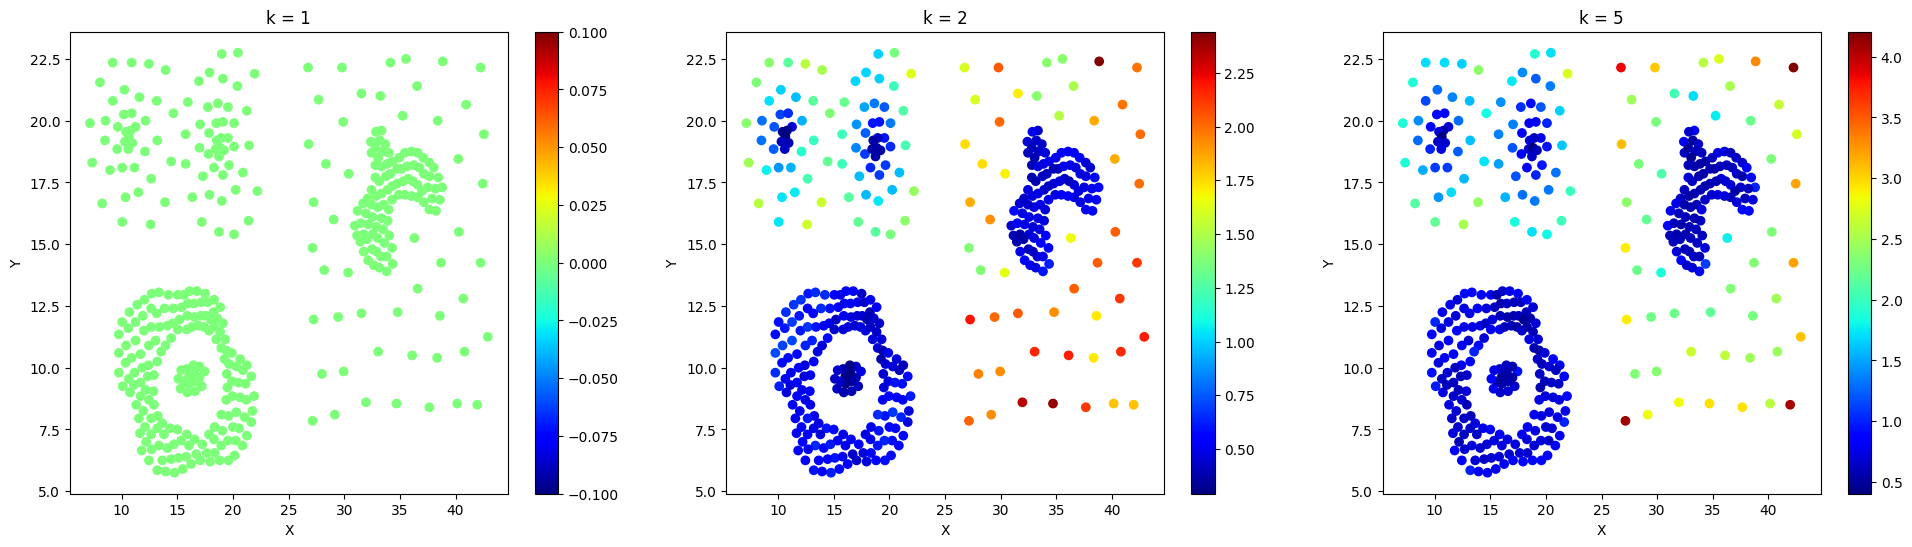

In [436]:
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Cdata.to_numpy())
    distances, indices = nbrs.kneighbors(Cdata.to_numpy())
    anomaly_score = distances[:, k-1]

    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Cdata.X, Cdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Cdata.index, columns=['Anomaly Score'])
    result = pd.concat((Cdata, anom), axis=1)
    results.append(result)
plt.show()

In [437]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0  26.75  22.15            0.0
1  29.80  22.15            0.0
2  31.55  21.10            0.0
3  27.70  20.85            0.0
4  29.90  19.95            0.0

In [438]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
43  38.85  22.40       2.441823
22  34.70   8.55       2.400521
21  31.95   8.60       2.326478
13  27.25  11.95       2.202272
36  42.90  11.25       2.184033

In [439]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
42  42.25  22.15       4.205948
19  27.15   7.85       4.101219
37  41.95   8.50       4.070626
0   26.75  22.15       3.842200
43  38.85  22.40       3.301515

In [440]:
Fdata = pd.read_csv('./data/flame.txt', header=None, index_col=None, names=headers, sep='\t')
Fdata.drop(columns=['Class'], inplace=True)
Fdata

X      Y
0    1.85  27.80
1    1.35  26.65
2    1.40  23.25
3    0.85  23.05
4    0.50  22.35
..    ...    ...
235  7.50  26.20
236  7.50  25.65
237  7.05  25.85
238  6.90  27.15
239  6.15  26.90

[240 rows x 2 columns]

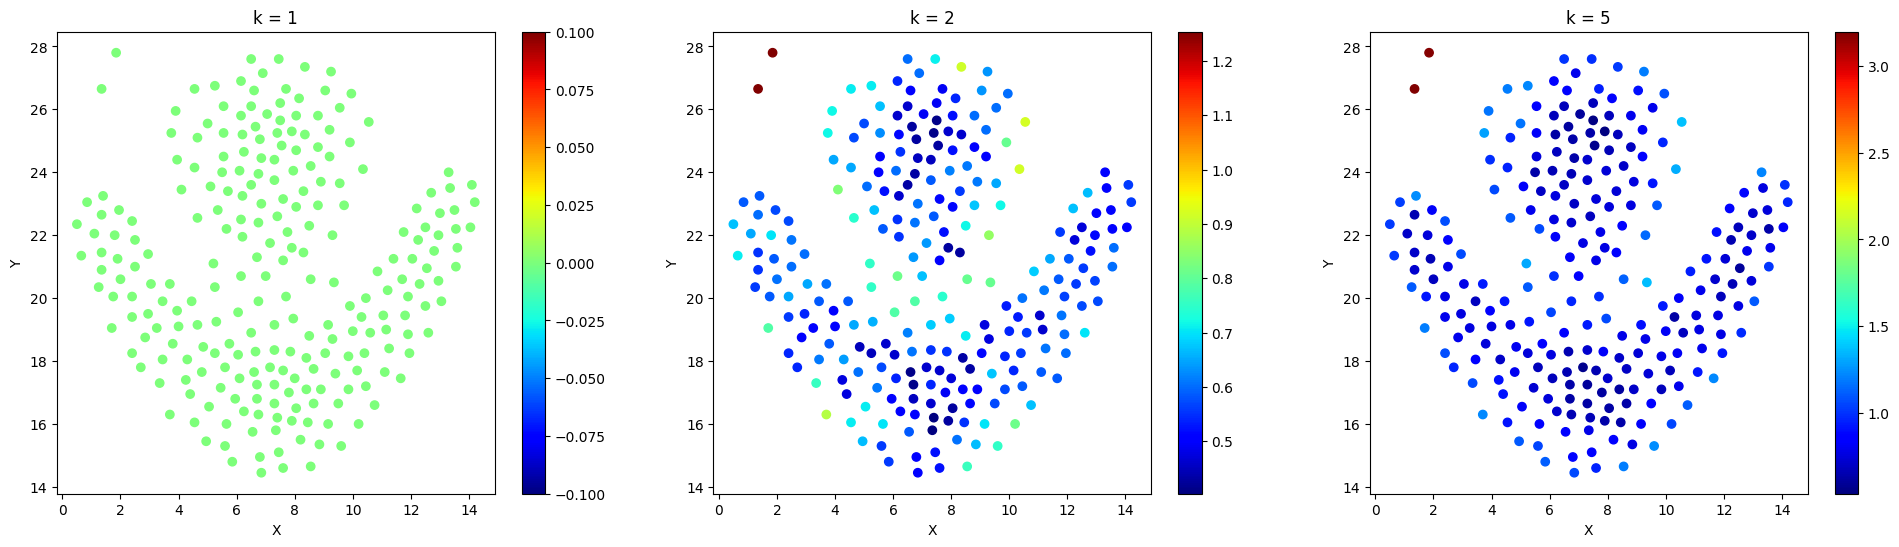

In [441]:
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Fdata.to_numpy())
    distances, indices = nbrs.kneighbors(Fdata.to_numpy())
    anomaly_score = distances[:, k-1]

    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Fdata.X, Fdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Fdata.index, columns=['Anomaly Score'])
    result = pd.concat((Fdata, anom), axis=1)
    results.append(result)
plt.show()

In [442]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0  1.85  27.80            0.0
1  1.35  26.65            0.0
2  1.40  23.25            0.0
3  0.85  23.05            0.0
4  0.50  22.35            0.0

In [443]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0     1.85  27.80       1.253994
1     1.35  26.65       1.253994
204  10.55  25.60       0.919239
192  10.35  24.10       0.917878
201   8.35  27.35       0.912414

In [444]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
1     1.35  26.65       3.200000
0     1.85  27.80       3.180016
204  10.55  25.60       1.372953
158   9.35  20.50       1.364734
192  10.35  24.10       1.320984

In [445]:
Pdata = pd.read_csv('./data/pathbased.txt', header=None, index_col=None, names=headers, sep='\t')
Pdata.drop(columns=['Class'], inplace=True)
Pdata


X      Y
0    11.25   5.05
1    10.95   4.70
2     9.85   5.80
3     9.80   5.75
4     9.15   6.80
..     ...    ...
295  17.50  18.05
296  16.65  17.50
297  15.45  17.30
298  15.45  17.80
299  15.70  18.40

[300 rows x 2 columns]

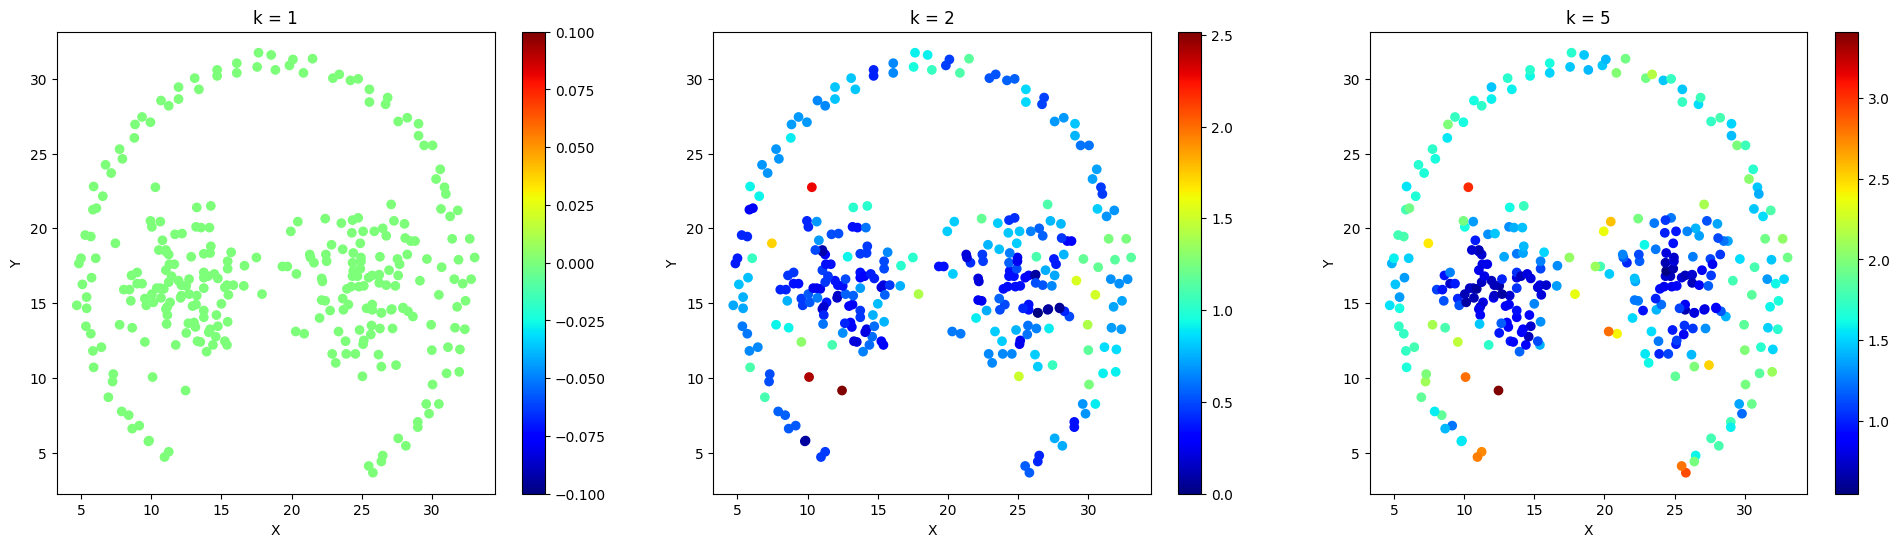

In [446]:
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Pdata.to_numpy())
    distances, indices = nbrs.kneighbors(Pdata.to_numpy())
    anomaly_score = distances[:, k-1]

    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Pdata.X, Pdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Pdata.index, columns=['Anomaly Score'])
    result = pd.concat((Pdata, anom), axis=1)
    results.append(result)
plt.show()

In [447]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X     Y  Anomaly Score
0  11.25  5.05            0.0
1  10.95  4.70            0.0
2   9.85  5.80            0.0
3   9.80  5.75            0.0
4   9.15  6.80            0.0

In [448]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
202  12.45   9.15       2.516446
203  10.10  10.05       2.413504
270  10.30  22.75       2.277060
266   7.45  19.00       1.720465
106  29.15  16.50       1.533786

In [449]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
202  12.45   9.15       3.407712
270  10.30  22.75       3.022003
101  25.80   3.65       2.920616
144  20.30  13.10       2.821790
203  10.10  10.05       2.807134

In [450]:
## Part III:

In [451]:
from sys import maxsize

def relative_density(distances, indices, k, avg):
    anomaly_score = []
    n = len(distances)
    for i in range(n):
        x_density = ((1 / distances[i, k-1]) if avg==False else (1 / np.mean(distances[i, :]))
            ) if distances[i, k-1] != 0 else maxsize # fix divide by zero error when the distance of the point to itself is 0
        y_densities = [x_density] # the first nearest neighbor is the point itself
        for j in range(1, len(indices[i])):
            yj_density = ((1 / distances[j, k-1]) if avg==False else (1 / np.mean(distances[j, :]))
                ) if distances[j, k-1] != 0 else maxsize
            y_densities.append(yj_density)
        x_relative_density = (np.sum(y_densities) / k) / x_density
        anomaly_score.append(x_relative_density)
    return anomaly_score


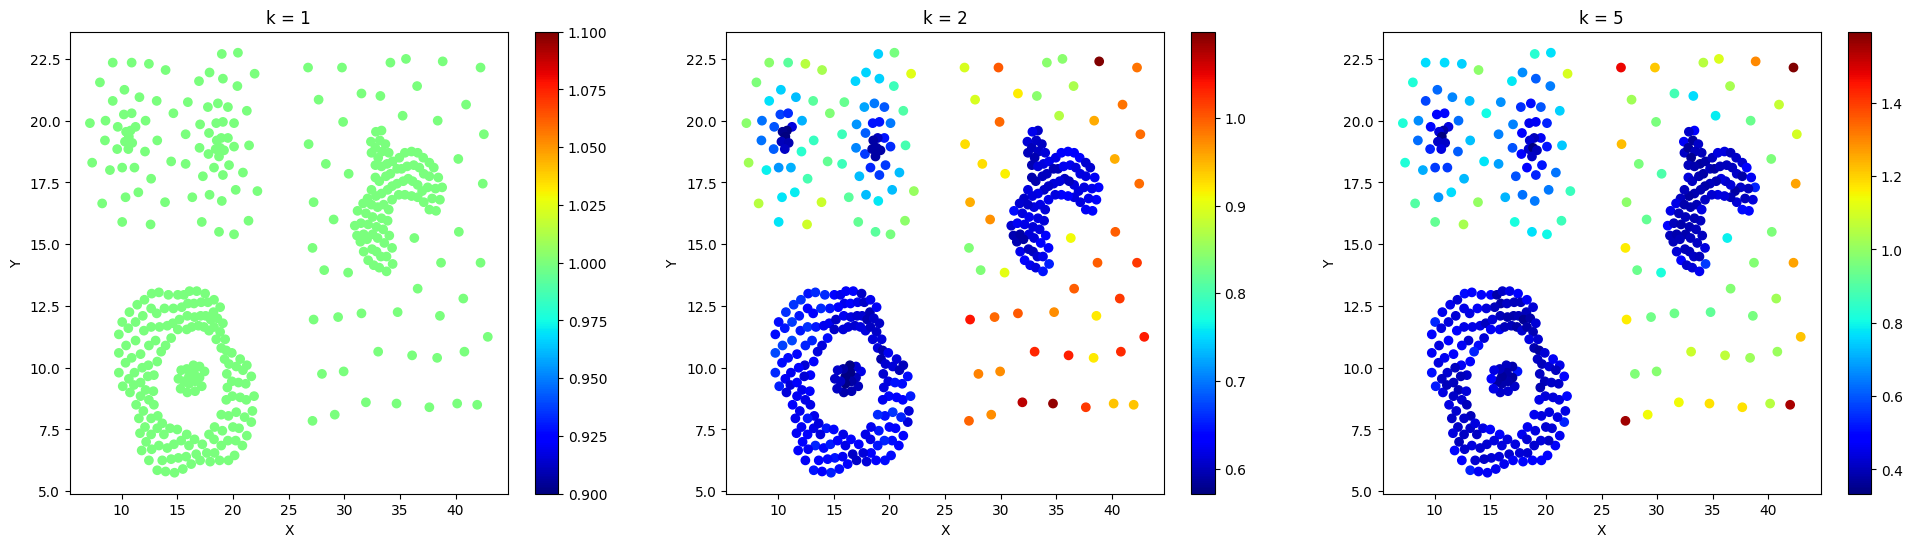

In [452]:
# A.
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Cdata.to_numpy())
    distances, indices = nbrs.kneighbors(Cdata.to_numpy())
    anomaly_score = relative_density(distances, indices, k, avg=False)
    
    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Cdata.X, Cdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Cdata.index, columns=['Anomaly Score'])
    result = pd.concat((Cdata, anom), axis=1)
    results.append(result)
plt.show()

In [453]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0  26.75  22.15            1.0
1  29.80  22.15            1.0
2  31.55  21.10            1.0
3  27.70  20.85            1.0
4  29.90  19.95            1.0

In [454]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
43  38.85  22.40       1.098242
22  34.70   8.55       1.088123
21  31.95   8.60       1.069982
13  27.25  11.95       1.039552
36  42.90  11.25       1.035084

In [455]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
42  42.25  22.15       1.594215
19  27.15   7.85       1.559499
37  41.95   8.50       1.549358
0   26.75  22.15       1.473638
43  38.85  22.40       1.294408

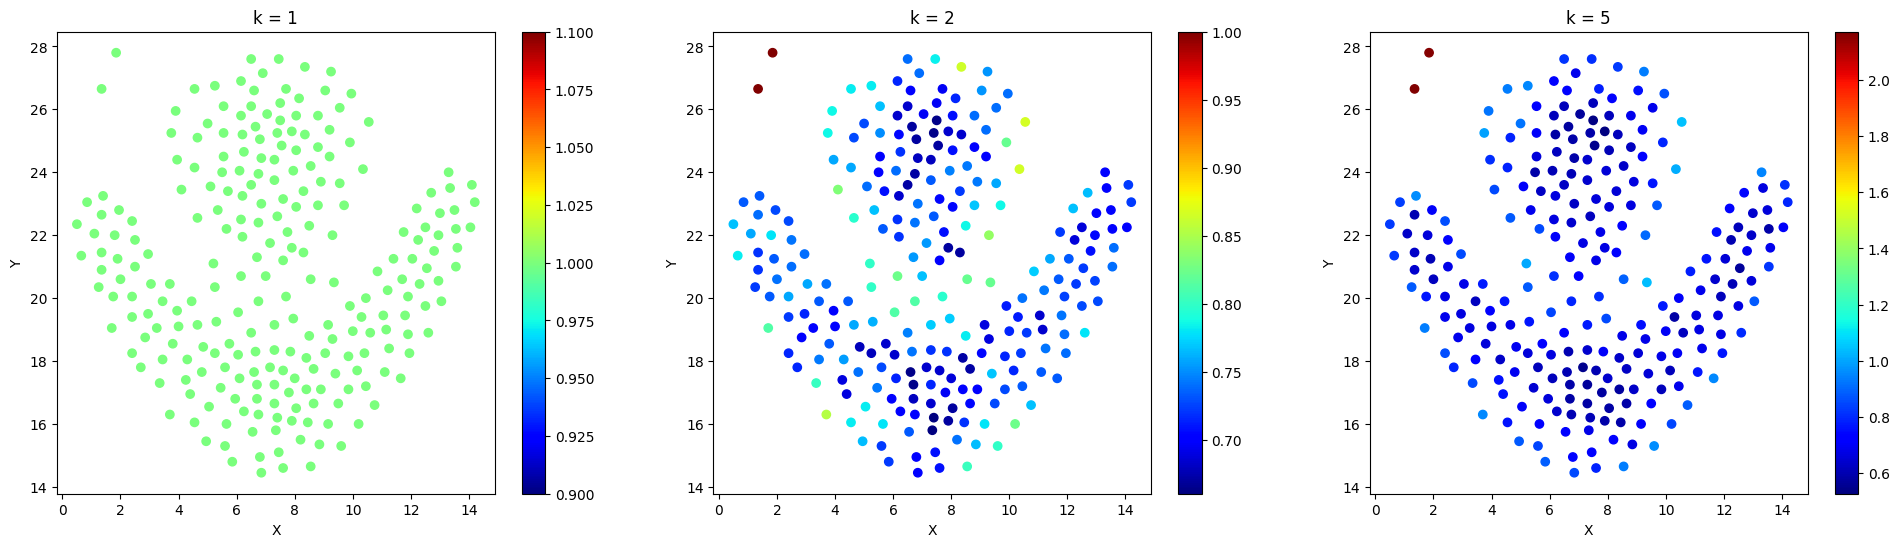

In [456]:
# A.
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Fdata.to_numpy())
    distances, indices = nbrs.kneighbors(Fdata.to_numpy())
    anomaly_score = relative_density(distances, indices, k, avg=False)
    
    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Fdata.X, Fdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Fdata.index, columns=['Anomaly Score'])
    result = pd.concat((Fdata, anom), axis=1)
    results.append(result)
plt.show()

In [457]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0  1.85  27.80            1.0
1  1.35  26.65            1.0
2  1.40  23.25            1.0
3  0.85  23.05            1.0
4  0.50  22.35            1.0

In [458]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0     1.85  27.80       1.000000
1     1.35  26.65       1.000000
204  10.55  25.60       0.866525
192  10.35  24.10       0.865982
201   8.35  27.35       0.863803

In [459]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
1     1.35  26.65       2.171220
0     1.85  27.80       2.158909
204  10.55  25.60       1.045748
158   9.35  20.50       1.040685
192  10.35  24.10       1.013735

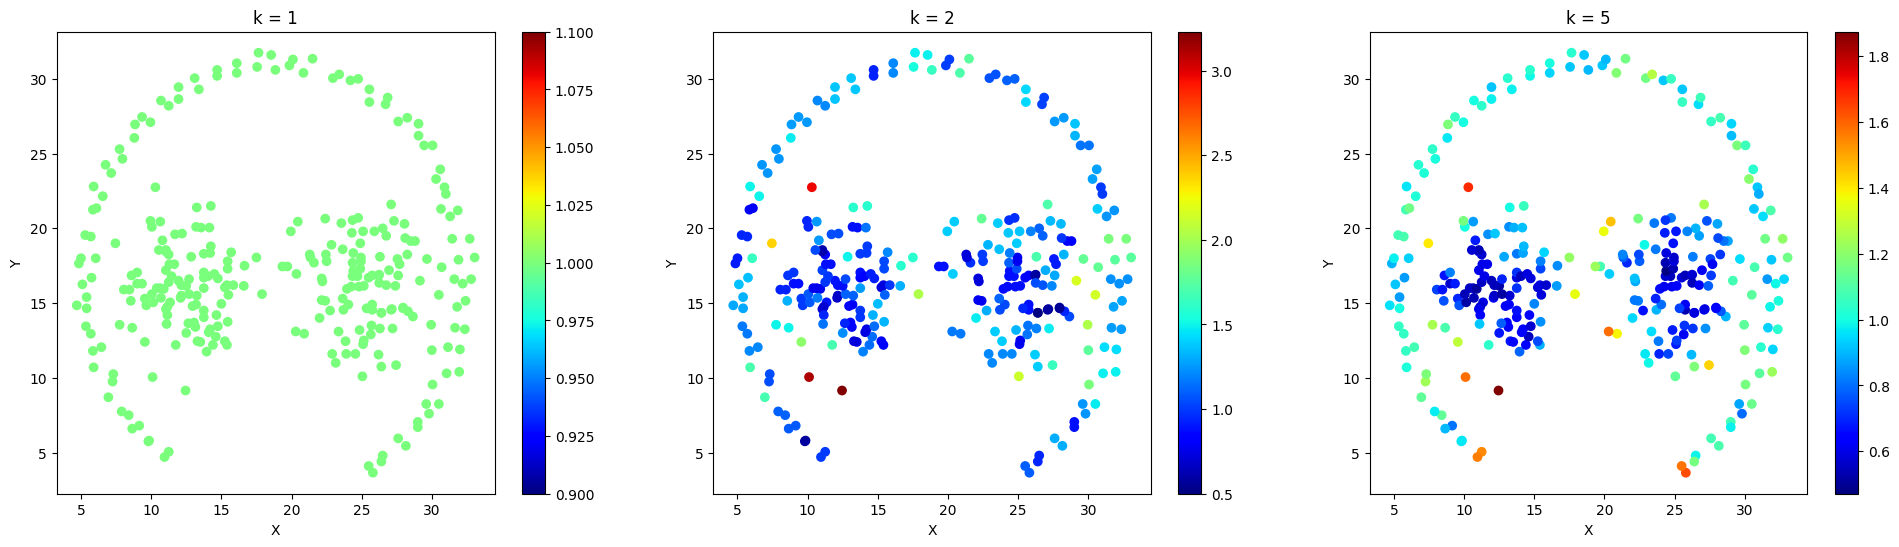

In [460]:
# A.
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Pdata.to_numpy())
    distances, indices = nbrs.kneighbors(Pdata.to_numpy())
    anomaly_score = relative_density(distances, indices, k, avg=False)
    
    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Pdata.X, Pdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Pdata.index, columns=['Anomaly Score'])
    result = pd.concat((Pdata, anom), axis=1)
    results.append(result)
plt.show()

In [461]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X     Y  Anomaly Score
0  11.25  5.05            1.0
1  10.95  4.70            1.0
2   9.85  5.80            1.0
3   9.80  5.75            1.0
4   9.15  6.80            1.0

In [462]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
202  12.45   9.15       3.229469
203  10.10  10.05       3.117812
270  10.30  22.75       2.969818
266   7.45  19.00       2.366106
106  29.15  16.50       2.163625

In [463]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
202  12.45   9.15       1.874081
270  10.30  22.75       1.684597
101  25.80   3.65       1.634789
144  20.30  13.10       1.586240
203  10.10  10.05       1.579040

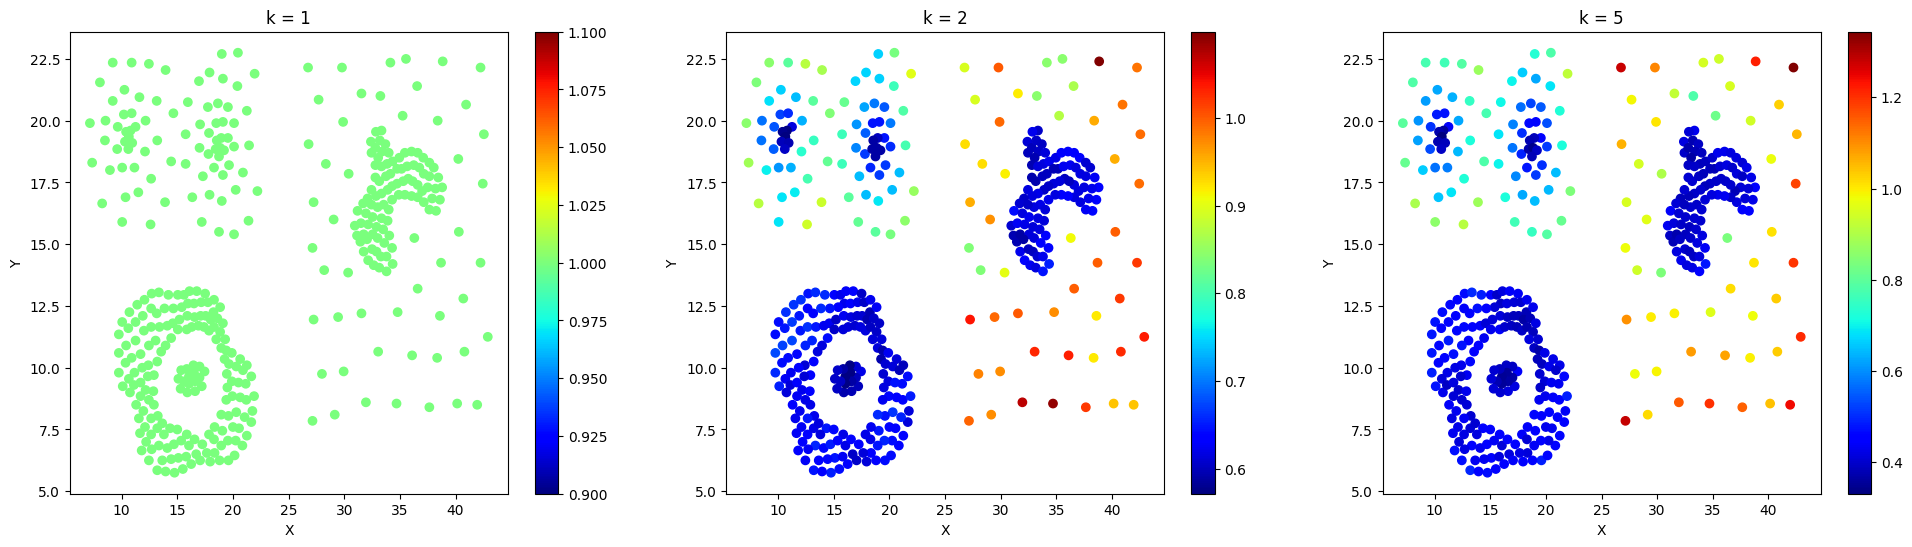

In [464]:
# B.
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Cdata.to_numpy())
    distances, indices = nbrs.kneighbors(Cdata.to_numpy())
    anomaly_score = relative_density(distances, indices, k, avg=True)
    
    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Cdata.X, Cdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Cdata.index, columns=['Anomaly Score'])
    result = pd.concat((Cdata, anom), axis=1)
    results.append(result)
plt.show()

In [465]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0  26.75  22.15            1.0
1  29.80  22.15            1.0
2  31.55  21.10            1.0
3  27.70  20.85            1.0
4  29.90  19.95            1.0

In [466]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
43  38.85  22.40       1.098242
22  34.70   8.55       1.088123
21  31.95   8.60       1.069982
13  27.25  11.95       1.039552
36  42.90  11.25       1.035084

In [467]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
42  42.25  22.15       1.343906
19  27.15   7.85       1.280983
0   26.75  22.15       1.277598
37  41.95   8.50       1.241962
43  38.85  22.40       1.220219

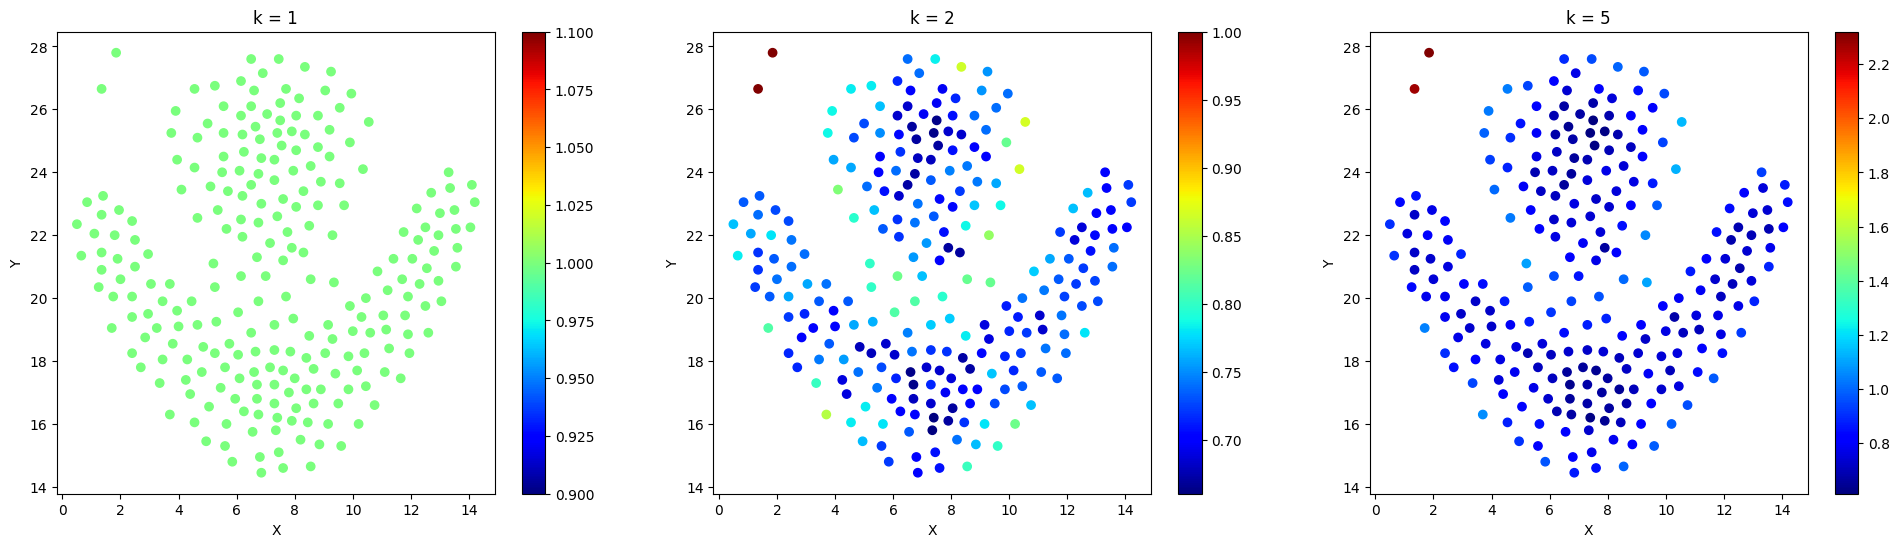

In [468]:
# B.
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Fdata.to_numpy())
    distances, indices = nbrs.kneighbors(Fdata.to_numpy())
    anomaly_score = relative_density(distances, indices, k, avg=True)
    
    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Fdata.X, Fdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Fdata.index, columns=['Anomaly Score'])
    result = pd.concat((Fdata, anom), axis=1)
    results.append(result)
plt.show()

In [469]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0  1.85  27.80            1.0
1  1.35  26.65            1.0
2  1.40  23.25            1.0
3  0.85  23.05            1.0
4  0.50  22.35            1.0

In [470]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0     1.85  27.80       1.000000
1     1.35  26.65       1.000000
204  10.55  25.60       0.866525
192  10.35  24.10       0.865982
201   8.35  27.35       0.863803

In [471]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
0     1.85  27.80       2.319991
1     1.35  26.65       2.266994
204  10.55  25.60       1.135562
192  10.35  24.10       1.124632
158   9.35  20.50       1.101843

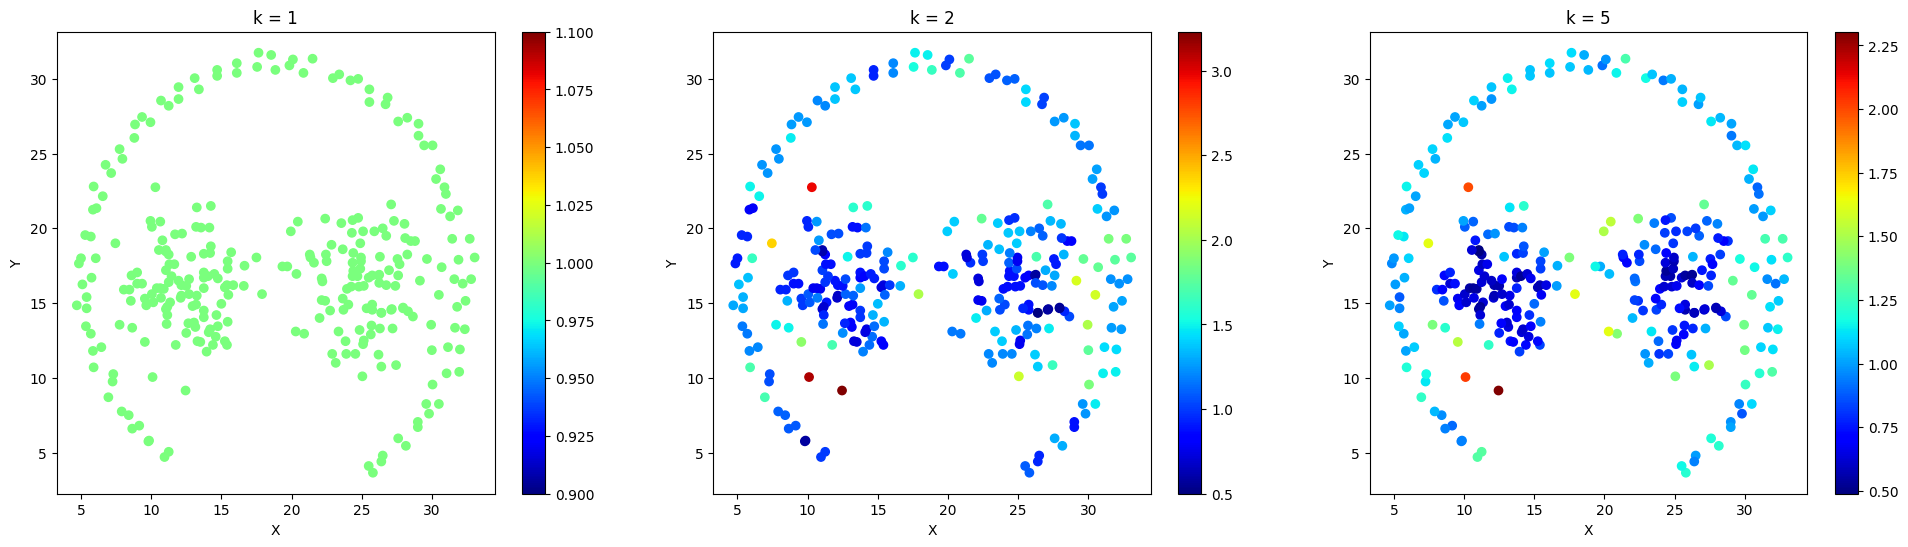

In [472]:
# B.
knn = [1, 2, 5]
fig = plt.figure(figsize=(24,6))
i = 0
results = []
for k in knn:
    i += 1
    nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(Pdata.to_numpy())
    distances, indices = nbrs.kneighbors(Pdata.to_numpy())
    anomaly_score = relative_density(distances, indices, k, avg=True)
    
    ax = fig.add_subplot(1, 3, i)
    p = ax.scatter(Pdata.X, Pdata.Y, c=anomaly_score, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'k = {k}')
    fig.colorbar(p)

    anom = pd.DataFrame(anomaly_score, index=Pdata.index, columns=['Anomaly Score'])
    result = pd.concat((Pdata, anom), axis=1)
    results.append(result)
plt.show()

In [473]:
# k = 1
results[0].nlargest(5, 'Anomaly Score')

X     Y  Anomaly Score
0  11.25  5.05            1.0
1  10.95  4.70            1.0
2   9.85  5.80            1.0
3   9.80  5.75            1.0
4   9.15  6.80            1.0

In [474]:
# k = 2
results[1].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
202  12.45   9.15       3.229469
203  10.10  10.05       3.117812
270  10.30  22.75       2.969818
266   7.45  19.00       2.366106
106  29.15  16.50       2.163625

In [475]:
# k = 5
results[2].nlargest(5, 'Anomaly Score')

X      Y  Anomaly Score
202  12.45   9.15       2.303806
203  10.10  10.05       2.023208
270  10.30  22.75       1.995295
266   7.45  19.00       1.628387
294  17.90  15.60       1.626212